# Assignment 4.2: Checking Validity of Parse Trees

In [5]:
!pip show wget

Name: wget
Version: 3.2
Summary: pure python download utility
Home-page: http://bitbucket.org/techtonik/python-wget/
Author: anatoly techtonik <techtonik@gmail.com>
Author-email: 
License: Public Domain
Location: C:\Users\dnhtr\miniconda3\envs\myenv\Lib\site-packages
Requires: 
Required-by: 


In [6]:
# Download https://nlp.stanford.edu/software/stanford-corenlp-4.5.10.zip using wget
# import wget
# import zipfile

# wget.download(url="https://nlp.stanford.edu/software/stanford-corenlp-4.5.10.zip", out="stanford-corenlp-4.5.10.zip")

# with zipfile.ZipFile("stanford-corenlp-4.5.10.zip", "r") as zip_ref:
#     zip_ref.extractall("standford-corenlp-4.5.10")

In [7]:
import nltk
import os

# Config java path
nltk.internals.config_java("C:\\Program Files\\Java\\jdk-15.0.2\\bin\\java.exe") # type: ignore
os.environ["JAVAHOME"] = "C:\\Program Files\\Java\\jdk-15.0.2\\bin\\java.exe" # type: ignore

In [8]:
import os

from nltk.parse.corenlp import CoreNLPServer

__root__ = os.getcwd()
__standford_corenlp_dir__ = os.path.join(__root__, "stanford-corenlp-4.2.0", "stanford-corenlp-4.2.0")

model = CoreNLPServer(
    path_to_jar=os.path.join(__standford_corenlp_dir__, "stanford-corenlp-4.2.0.jar"),
    path_to_models_jar=os.path.join(__standford_corenlp_dir__, "stanford-corenlp-4.2.0-models.jar"),
)

model.start()

(ROOT
  (S
    (NP (PRP$ my) (JJ english) (NN instructor))
    (VP (VBD were) (NP (DT a) (JJ good) (NN teacher)))
    (. .)))
                        ROOT                         
                         |                            
                         S                           
         ________________|_________________________   
        |                         VP               | 
        |                 ________|___             |  
        NP               |            NP           | 
  ______|________        |     _______|______      |  
PRP$    JJ       NN     VBD   DT      JJ     NN    . 
 |      |        |       |    |       |      |     |  
 my  english instructor were  a      good teacher  . 



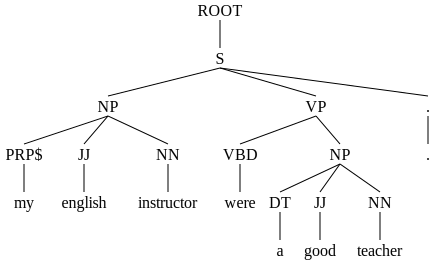

In [9]:
from nltk.tree import Tree
from nltk.parse.corenlp import CoreNLPParser

def parse_processing(string):
    #Tạo parse tree
    parser = CoreNLPParser()
    parse = next(parser.raw_parse(string))
    
    #Định dạng kiểu cho parse tree
    tree = Tree.fromstring(str(parse), 
               read_node=lambda s: "%s" % s, # xuất node
               read_leaf=lambda s: "%s" % s.lower()) # xuất lá
    return tree

string = "My English Instructor were a good teacher."
tree = parse_processing(string)
print(tree)
tree.pretty_print()
tree

In [10]:
print(tree.leaves())
for child in tree:
    print(child.label())

['my', 'english', 'instructor', 'were', 'a', 'good', 'teacher', '.']
S


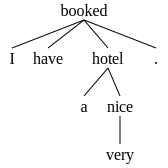

In [11]:
# phân tích dependency parsing 
from nltk.parse.corenlp import CoreNLPDependencyParser

#string = 'I put the book in the box on the table.'
string = 'I have booked a very nice hotel.'
parser = CoreNLPDependencyParser()
parse = next(parser.raw_parse(string))

parse.tree()